In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
from google.colab import files
upload = files.upload()

Saving My Uber Drives - 2016.csv to My Uber Drives - 2016.csv


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [4]:
df = pd.read_csv('My Uber Drives - 2016.csv')
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [5]:
df[df.duplicated()]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
492,6/28/2016 23:34,6/28/2016 23:59,Business,Durham,Cary,9.9,Meeting


In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.drop(df.index[[751, 761, 798, 807]], inplace=True)

In [8]:
df.columns = ['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES', 'PURPOSE']

In [9]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors='coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], errors='coerce')

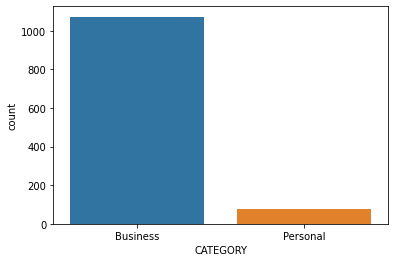

In [24]:
sns.countplot(x=df['CATEGORY'])

Purpose

Text(0.5, 1.0, 'Count vs purpose')

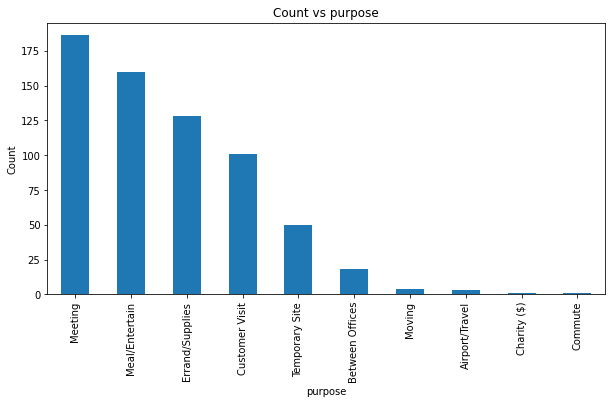

In [28]:
months = df['PURPOSE'].value_counts().nlargest(10)
months.plot(kind='bar', figsize=(10,5))
plt.xlabel('purpose')
plt.ylabel('Count')
plt.title('Count vs purpose')

from where the user traveled from

Text(0.5, 1.0, 'Pickup point vs Frequency')

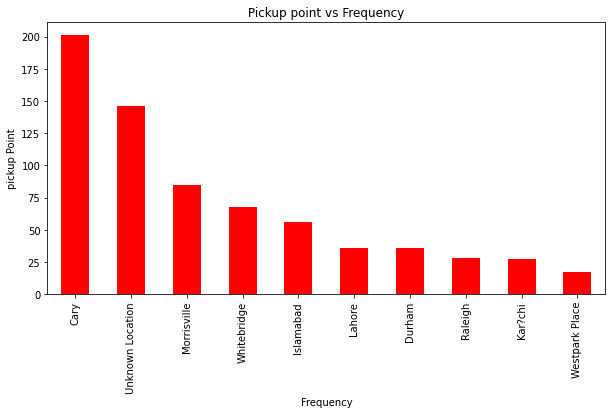

In [34]:
start = df['START'].value_counts().nlargest(10)
start.plot(kind='bar', color='red', figsize=(10,5))
plt.xlabel('Frequency')
plt.ylabel('pickup Point')
plt.title('Pickup point vs Frequency')

destination of these trips.

Text(0.5, 1.0, 'End point vs Frequency')

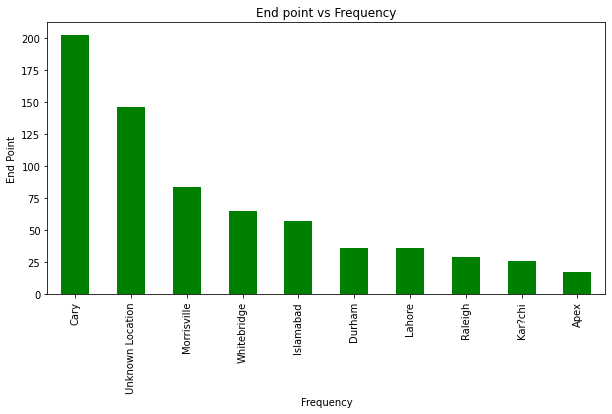

In [35]:
end = df['STOP'].value_counts().nlargest(10)
end.plot(kind='bar', color='green', figsize=(10,5))
plt.xlabel('Frequency')
plt.ylabel('End Point')
plt.title('End point vs Frequency')

month-wise distribution of Uber trips

In [12]:
df['MONTH'] = pd.DatetimeIndex(df['START_DATE']).month
month_label = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'April', 5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'Aug', 9.0: 'Sep',
      10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec' }
df["MONTH"] = df.MONTH.map(month_label)
df.MONTH.unique()

array(['Jan', 'Feb', 'Mar', 'April', 'May', 'June', 'July', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec', nan], dtype=object)

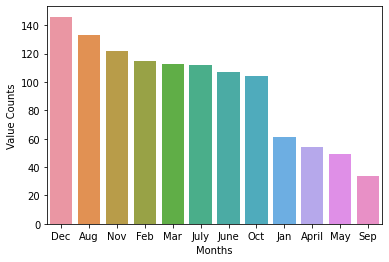

In [13]:
month_count = df.MONTH.value_counts()
sns.barplot(x=month_count.index, y=month_count);
plt.xlabel('Months')
plt.ylabel('Value Counts');

In [14]:
miles_dic = {}
for i in df.MILES:
    if i < 10:
        if '0-10 miles' not in miles_dic:
            miles_dic['0-10 miles'] = [i]
        else:
            miles_dic['0-10 miles'].append(i)
            
    elif i >= 10 and i < 20:
        if '10-20 miles' not in miles_dic:
            miles_dic['10-20 miles'] = [i]
        else:
            miles_dic['10-20 miles'].append(i)
            
    elif i >= 20 and i < 30:
        if '20-30 miles' not in miles_dic:
          miles_dic['20-30 miles'] = [i]
        else:
            miles_dic['20-30 miles'].append(i)
            
    elif i >= 30 and i < 40:
        if '30-40 miles' not in miles_dic:
            miles_dic['30-40 miles'] = [i]
        else:
            miles_dic['30-40 miles'].append(i)
            
    elif i >= 40 and i < 50:
        if '40-50 miles' not in miles_dic:
            miles_dic['40-50 miles'] = [i]
        else:
            miles_dic['40-50 miles'].append(i)
    else:
        if 'Above 50 miles' not in miles_dic:
            miles_dic['Above 50 miles'] = [i]
        else:
            miles_dic['Above 50 miles'].append(i)

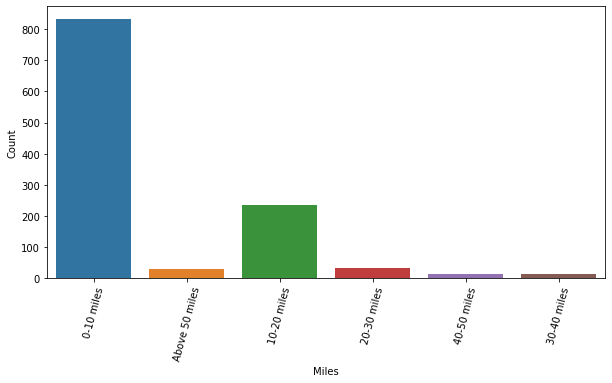

In [15]:
len_miles = []
for key in miles_dic:
    len_miles.append((key, len(miles_dic[key])))
a, b = [], []
for i, j in len_miles:
    a.append(i)
    b.append(j)
plt.figure(figsize=(10, 5))
plt.xticks(rotation=75)
sns.barplot(x=a, y=b)
plt.xlabel('Miles')
plt.ylabel('Count');

In [16]:
df['DAY'] = df.START_DATE.dt.weekday
day_label = {
    0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thus', 4: 'Fri', 5: 'Sat', 6: 'Sun'
}
df['DAY'] = df['DAY'].map(day_label)

Number of trips on a particular day

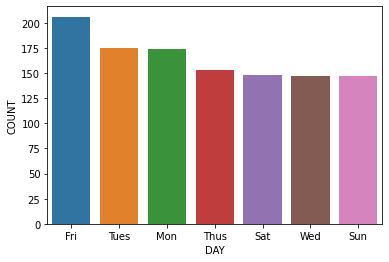

In [17]:
day_label = df.DAY.value_counts()
sns.barplot(x=day_label.index, y=day_label);
plt.xlabel('DAY')
plt.ylabel('COUNT');

Uber Calls Category-wise

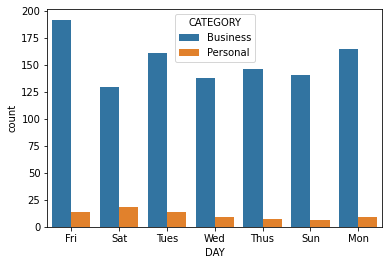

In [18]:
sns.countplot(hue='CATEGORY', x='DAY', data=df);